<a href="https://colab.research.google.com/github/alimahatma/AI-Praktikum/blob/main/Salinan_dari_topic_model_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyLDAvis gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 31.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [ ]:
import os
import json
import numpy as np
import pandas as pd
import re
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

init_notebook_mode(connected=True) #do not miss this line

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline


In [ ]:
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.6 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade pandas

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm_notebook as tqdm
from Levenshtein import ratio as levenshtein_distance

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

from scipy import spatial


In [ ]:
df = pd.read_csv('datasets-gojek/GojekAppReviewV4.0.0-V4.9.3_Cleaned.csv')

In [ ]:
print(df.head())

                  userName                                            content  \
0                Yuga Edit                            akun gopay saya di blok   
1                 ff burik  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Anisa Suci Rahmayuliani  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3             naoki yakuza  Baru download gojek dan hape baru trus ditop u...   
4            Trio Sugianto                                             Mantap   

   score                   at appVersion  
0      1  2022-01-21 10:52:12      4.9.3  
1      3  2021-11-30 15:40:38      4.9.3  
2      4  2021-11-29 22:58:12      4.9.3  
3      1  2022-09-03 15:21:17      4.9.3  
4      5  2022-01-15 10:05:27      4.9.3  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225002 entries, 0 to 225001
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   userName    225002 non-null  object
 1   content     225000 non-null  object
 2   score       225002 non-null  int64 
 3   at          225002 non-null  object
 4   appVersion  225002 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.6+ MB
None


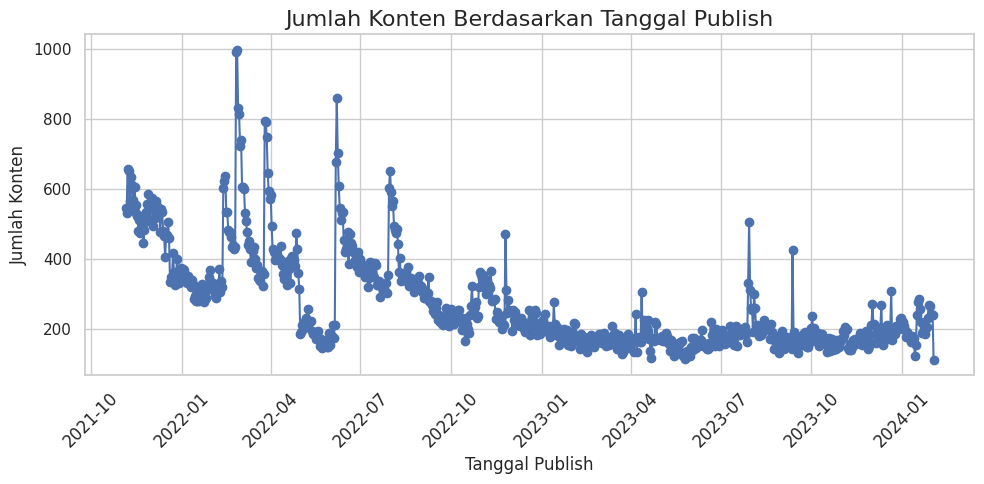

In [ ]:
df['publish_date']=pd.to_datetime(df['at'])
content_count_by_date = df.groupby(df['publish_date'].dt.date).size().reset_index(name='content_count')

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
plt.plot(content_count_by_date['publish_date'], content_count_by_date['content_count'], marker='o', linestyle='-')
plt.title('Jumlah Konten Berdasarkan Tanggal Publish', fontsize=16)
plt.xlabel('Tanggal Publish', fontsize=12)
plt.ylabel('Jumlah Konten', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

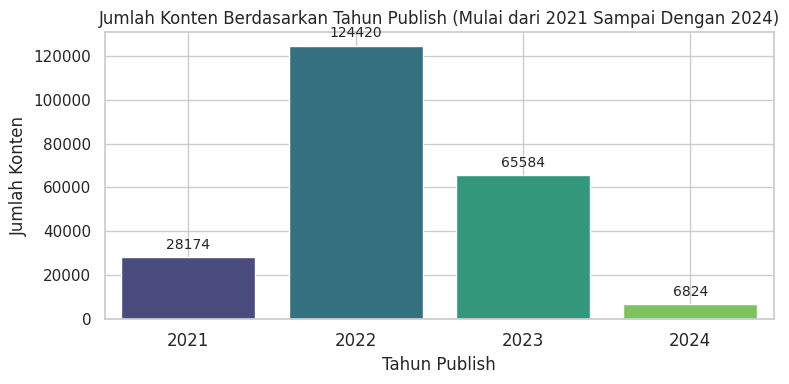

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Hitung jumlah konten berdasarkan tahun
df['publish_year'] = df['publish_date'].dt.year
content_count_by_year = df.groupby(df['publish_year']).size().reset_index(name='content_count')

# Filter tahun mulai dari tahun 2021
content_count_by_year = content_count_by_year[content_count_by_year['publish_year'] >= 2021]

# Gunakan tema Seaborn yang terintegrasi
sns.set_theme(style="whitegrid")

# Visualisasi data menggunakan diagram batang
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='publish_year', y='content_count', data=content_count_by_year, palette="viridis")
plt.title('Jumlah Konten Berdasarkan Tahun Publish (Mulai dari 2021 Sampai Dengan 2024)', fontsize=12)
plt.xlabel('Tahun Publish', fontsize=12)
plt.ylabel('Jumlah Konten', fontsize=12)
plt.xticks(fontsize=12)
plt.grid(True)

# Menambahkan label jumlah pada setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=10)

plt.tight_layout()
plt.savefig('jml-konten-berdasar-tahun')
plt.show()


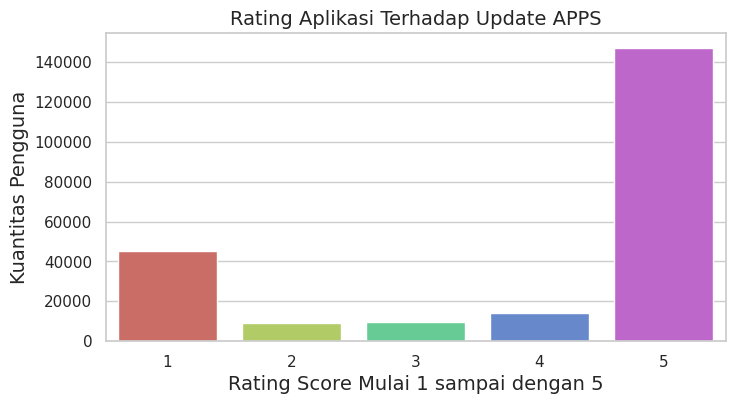

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='score', data=df, palette='hls')
plt.xlabel("Rating Score Mulai 1 sampai dengan 5", fontsize=14)
plt.ylabel("Kuantitas Pengguna", fontsize=14)
plt.title("Rating Aplikasi Terhadap Update APPS", fontsize=14)
plt.show()

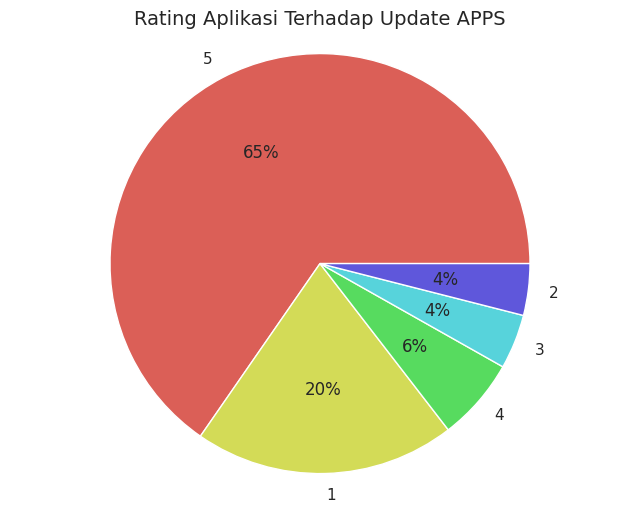

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah rating
rating_counts = df['score'].value_counts()

# Visualisasi data menggunakan pie chart
plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.0f%%', colors=sns.color_palette('hls'))
plt.title('Rating Aplikasi Terhadap Update APPS', fontsize=14)
plt.axis('equal')  # Membuat lingkaran menjadi persegi
plt.savefig('rating pengguna')
plt.show()


In [ ]:
print(df.describe())

               score                   publish_date   publish_year
count  225002.000000                         225002  225002.000000
mean        3.928996  2022-09-27 13:56:54.894676736    2022.226922
min         1.000000            2021-11-05 00:36:56    2021.000000
25%         3.000000  2022-03-08 01:01:59.249999872    2022.000000
50%         5.000000            2022-08-06 00:29:40    2022.000000
75%         5.000000  2023-04-01 15:27:37.249999872    2023.000000
max         5.000000            2024-02-02 09:03:24    2024.000000
std         1.630551                            NaN       0.697511


In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


#fungsi untuk mengubah teks menjadi huruf kecil
def lowercase_text(text):
    if isinstance(text, str):
        return text.lower()
    else:
        return ""


df['content_lowercase'] = df['content'].apply(lowercase_text)
print(df.head())

                  userName                                            content  \
0                Yuga Edit                            akun gopay saya di blok   
1                 ff burik  Lambat sekali sekarang ini bosssku apk gojek g...   
2  Anisa Suci Rahmayuliani  Kenapa sih dari kemarin sy buka aplikasi gojek...   
3             naoki yakuza  Baru download gojek dan hape baru trus ditop u...   
4            Trio Sugianto                                             Mantap   

   score                   at appVersion        publish_date  publish_year  \
0      1  2022-01-21 10:52:12      4.9.3 2022-01-21 10:52:12          2022   
1      3  2021-11-30 15:40:38      4.9.3 2021-11-30 15:40:38          2021   
2      4  2021-11-29 22:58:12      4.9.3 2021-11-29 22:58:12          2021   
3      1  2022-09-03 15:21:17      4.9.3 2022-09-03 15:21:17          2022   
4      5  2022-01-15 10:05:27      4.9.3 2022-01-15 10:05:27          2022   

                                   content_l

In [ ]:
import re

def remove_punctuation(text):
    text_without_punctuation = re.sub(r'[^\w\s]',' ', text)
    return text_without_punctuation


df['content_cleaned'] = df['content_lowercase'].apply(remove_punctuation)

In [ ]:
def remove_abbreviations(text):
    # Daftar kata singkatan yang ingin dihapus
    abbreviations = ['yg', 'nya', 'ga','gak','sy','u']

    # Menghapus kata-kata singkatan dari teks
    for abbv in abbreviations:
        text = re.sub(r'\b' + abbv + r'\b', '', text)

    return text

# Melakukan penghapusan kata-kata singkatan dari kolom 'normal_text'
df['content_cleaned'] = df['content_cleaned'].apply(remove_abbreviations)

In [ ]:
def clean_text(text):
    # Daftar kata singkatan dan kata-kata yang perlu diperbaiki
    replacements = {
        'bagu': 'bagus',
        'updat': 'update'
    }

    # Menghapus kata-kata dari teks
    cleaned_text = text
    for word, replacement in replacements.items():
        cleaned_text = re.sub(r'\b' + word + r'\b', replacement, cleaned_text)

    return cleaned_text

# Melakukan pembersihan kata-kata dari kolom 'normal_text'
df['content_cleaned'] = df['content_cleaned'].apply(clean_text)

In [ ]:
df = df[df['content_cleaned'].apply(lambda x: len(str(x)) > 1)]
df['content_cleaned'] = df['content_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 3]))

# TOKENIZING

In [ ]:
!pip install nltk

In [ ]:

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenize_text(text):
  tokens = word_tokenize(text)
  return tokens

df['tokens_content']=df['content_cleaned'].apply(tokenize_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# STOPWORD

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words= set(stopwords.words('indonesian'))

# print("\n====================")
# jumlah_stopwords = len(stop_words)
# print("\n Jumlah Stopword : \n", jumlah_stopwords)
# print("========Daftar Stopword Bahasa indonesia========")
# print(stop_words)

def remove_stopwords(tokens):
    tokens_without_stopwords = [word for word in tokens if word not in stop_words]
    return tokens_without_stopwords


df['token_without_stopwords']=df['tokens_content'].apply(remove_stopwords)

print(df[['tokens_content','token_without_stopwords']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                      tokens_content  \
0                          [akun, gopay, saya, blok]   
1  [lambat, sekali, sekarang, bosssku, gojek, kay...   
2  [kenapa, dari, kemarin, buka, aplikasi, gojek,...   
3  [baru, download, gojek, hape, baru, trus, dito...   
4                                           [mantap]   

                             token_without_stopwords  
0                                [akun, gopay, blok]  
1                     [lambat, bosssku, gojek, kaya]  
2  [kemarin, buka, aplikasi, gojek, kasih, bintan...  
3  [download, gojek, hape, trus, ditop, gopay, tr...  
4                                           [mantap]  


# STEMMING

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
import re

# factory = StemmerFactory()
stemmer = PorterStemmer()

def stem_text(tokens):
    stemed_tokens = [stemmer.stem(token) for token in tokens]
    return stemed_tokens


df['stemed_tokens'] = df['token_without_stopwords'].apply(stem_text)
print(df[['token_without_stopwords','stemed_tokens']].head())

                             token_without_stopwords  \
0                                [akun, gopay, blok]   
1                     [lambat, bosssku, gojek, kaya]   
2  [kemarin, buka, aplikasi, gojek, kasih, bintan...   
3  [download, gojek, hape, trus, ditop, gopay, tr...   
4                                           [mantap]   

                                       stemed_tokens  
0                                [akun, gopay, blok]  
1                     [lambat, bosssku, gojek, kaya]  
2  [kemarin, buka, aplikasi, gojek, kasih, bintan...  
3  [download, gojek, hape, tru, ditop, gopay, tra...  
4                                           [mantap]  


In [ ]:
data_ready = df['stemed_tokens']

In [ ]:
id2word = corpora.Dictionary(data_ready)
corpus = [id2word.doc2bow(text) for text in data_ready]

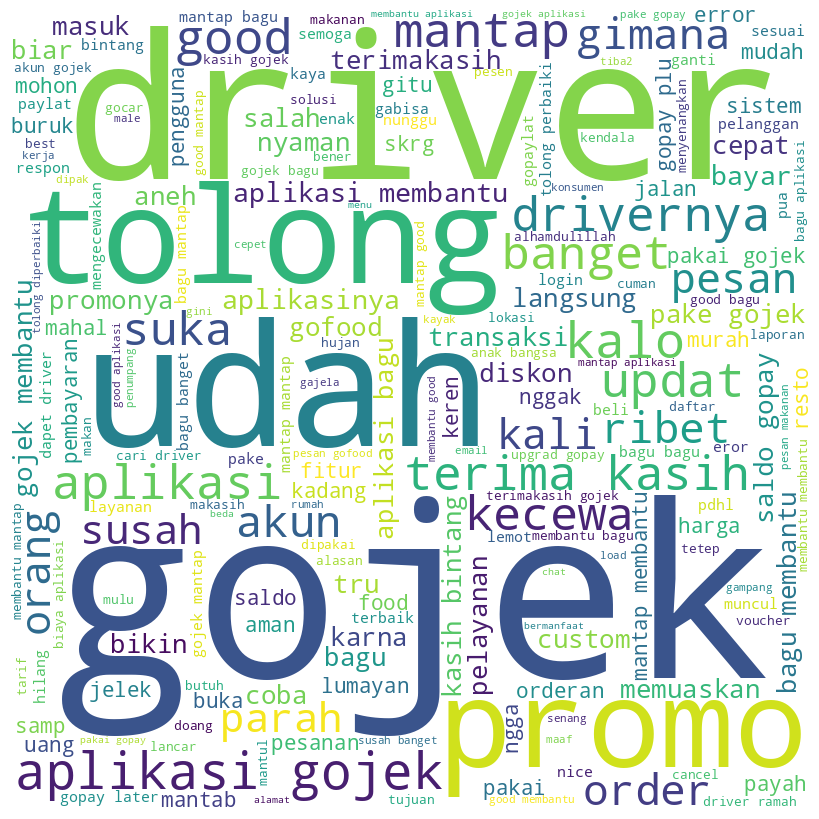

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua daftar kata-kata menjadi satu string
text = ' '.join([' '.join(tokens) for tokens in data_ready])

# Inisialisasi WordCloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(text)

# Plot word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig('analisis-wordcloud')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

combined_text = [' '.join(tokens) for tokens in data_ready]
combined_text= ' '.join(combined_text)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([combined_text])

words = tfidf_vectorizer.get_feature_names_out()
word_frequencies = tfidf_matrix.sum(axis=0)

word_freq_dict = {}
for word, frequency in zip(words, word_frequencies.tolist()[0]):
    word_freq_dict[word] = frequency


In [ ]:
top_20_words = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:20]
print("Top 20 kata dengan frekuensi TF-IDF terbesar:")
for word, frequency in top_20_words:
    print(f"{word}: {frequency}")


Top 20 kata dengan frekuensi TF-IDF terbesar:
gojek: 0.4935453591044137
aplikasi: 0.327002764336199
membantu: 0.2870172974183933
driver: 0.28470018305640077
bagu: 0.2688309985114386
mantap: 0.23547674703749316
gopay: 0.18428681264557875
good: 0.16417974788591969
banget: 0.13919454762732894
promo: 0.11946858720352392
udah: 0.11577949723245683
tolong: 0.11300505766743943
pake: 0.10242560130413132
gofood: 0.09619073436955926
kasih: 0.09393459670130336
pakai: 0.08271488505376047
cepat: 0.08102278180256854
akun: 0.08093131676196356
mahal: 0.0770745408831207
susah: 0.0724403121591356


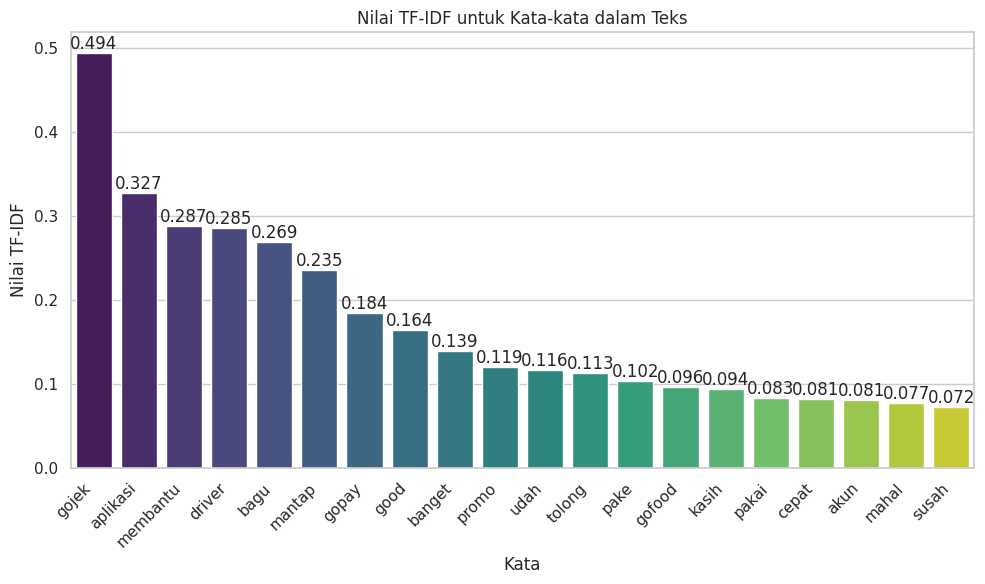

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Kata-kata dan nilai-nilai TF-IDF
words = ['gojek', 'aplikasi', 'membantu', 'driver', 'bagu',
         'mantap', 'gopay', 'good', 'banget', 'promo',
         'udah', 'tolong', 'pake', 'gofood', 'kasih',
         'pakai', 'cepat', 'akun', 'mahal', 'susah']
tfidf_values = [0.4935453588750289, 0.3270027641842181, 0.2870172972849964, 0.2847001829240808, 0.2688309983864941,
                0.23547674692805073, 0.18428681255992785, 0.16417974780961395, 0.13919454756263555, 0.11946858714799856,
                0.11577949717864604, 0.11300505761491812, 0.10242560125652703, 0.09619073432485273, 0.0939345966576454,
                0.08271488501531711, 0.08102278176491161, 0.08093131672434915, 0.0770745408472988, 0.07244031212546755]

# Membuat diagram batang
plt.figure(figsize=(10, 6))
sns.barplot(x=words, y=tfidf_values, palette='viridis')
plt.xlabel('Kata')
plt.ylabel('Nilai TF-IDF')
plt.title('Nilai TF-IDF untuk Kata-kata dalam Teks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Menambahkan angka pada setiap diagram
for i, value in enumerate(tfidf_values):
    plt.text(i, value, f'{value:.3f}', ha='center', va='bottom')

plt.savefig('analisis-tf-idf')
plt.show()


In [ ]:
import pyLDAvis.gensim_models
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

In [ ]:
normalized_text = [' '.join(tokens) for tokens in df['stemed_tokens']]
tokenized_text = [word_tokenize(text) for text in normalized_text]

In [ ]:
dictionary = Dictionary(tokenized_text)
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_text]

In [ ]:
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=6,
    passes=10
)

In [ ]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx, topic))

Topic: 0 
Words: 0.094*"driver" + 0.034*"gojek" + 0.019*"susah" + 0.016*"pesan" + 0.016*"order" + 0.015*"drivernya" + 0.014*"gofood" + 0.013*"pesen" + 0.012*"tolong" + 0.012*"makanan"
Topic: 1 
Words: 0.203*"mantap" + 0.032*"bintang" + 0.022*"gojek" + 0.018*"upgrad" + 0.018*"kasih" + 0.017*"anak" + 0.014*"lancar" + 0.012*"paylat" + 0.009*"bangsa" + 0.009*"aplikasi"
Topic: 2 
Words: 0.195*"bagu" + 0.108*"good" + 0.035*"gojek" + 0.033*"aplikasi" + 0.033*"pelayanan" + 0.026*"kasih" + 0.023*"keren" + 0.020*"semoga" + 0.020*"terima" + 0.014*"suks"
Topic: 3 
Words: 0.074*"gojek" + 0.052*"promo" + 0.031*"banget" + 0.027*"mudah" + 0.026*"mahal" + 0.026*"aplikasi" + 0.024*"voucher" + 0.022*"biaya" + 0.020*"suka" + 0.018*"diskon"
Topic: 4 
Words: 0.211*"membantu" + 0.053*"cepat" + 0.031*"ramah" + 0.029*"memuaskan" + 0.025*"aplikasi" + 0.024*"nyaman" + 0.022*"aman" + 0.017*"senang" + 0.017*"mantul" + 0.011*"pokoknya"
Topic: 5 
Words: 0.034*"gopay" + 0.030*"gojek" + 0.024*"aplikasi" + 0.022*"updat

In [ ]:
pyLDAvis.enable_notebook()
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)



In [ ]:
# Membuat objek model koherensi
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_text, dictionary=dictionary, coherence='c_v')

# Menghitung koherensi skor
coherence_lda = coherence_model_lda.get_coherence()

print('Coherence Score: ', coherence_lda)

Coherence Score:  0.509272018239457
